In [93]:
!pip install fitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from fitter import Fitter, get_common_distributions, get_distributions

Zbiór danych już po kilku modyfikacjach

In [95]:
df = pd.read_csv('/content/drive/MyDrive/data200.csv')

gender_change ={'Male':1,
         'Female':0}
df['gender'] = [gender_change[x] for x in df['gender']]
df.head()

,nr,gender,age,dominant_hand,height,weight,fp_temp,fp_height,fp_width,fp_area,fp_circ
0,101,1,NaN,Right,174.000000,70.000000,34.0,19.8,13.7,240.6,57.7
1,102,1,NaN,Right,202.000000,99.000000,30.0,24.0,14.1,278.8,62.7
2,103,1,NaN,Right,182.333333,82.000000,29.0,20.0,13.7,223.8,55.5
3,104,1,NaN,Right,184.000000,75.000000,29.0,23.2,14.0,281.8,63.3
4,105,1,18.0,Right,180.666667,80.333333,29.0,22.7,15.0,286.7,62.7


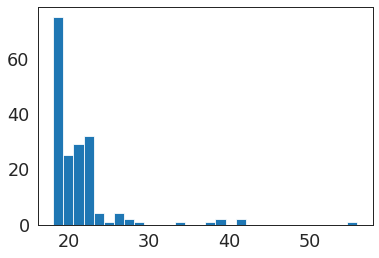

In [96]:
plt.hist(df['age'], 30)

plt.show()

In [97]:
df = df.drop(columns = ['nr', 'age','dominant_hand', 'fp_temp'])
print(df.head())
df.mean(axis=0)

   gender      height     weight  fp_height  fp_width  fp_area  fp_circ
0       1  174.000000  70.000000       19.8      13.7    240.6     57.7
1       1  202.000000  99.000000       24.0      14.1    278.8     62.7
2       1  182.333333  82.000000       20.0      13.7    223.8     55.5
3       1  184.000000  75.000000       23.2      14.0    281.8     63.3
4       1  180.666667  80.333333       22.7      15.0    286.7     62.7


gender         0.5850
height       173.1700
weight        72.3900
fp_height     20.3635
fp_width      13.4870
fp_area      233.5530
fp_circ       56.5745
dtype: float64

In [98]:
import seaborn as sns

In [99]:
# sns.pairplot(df, height=2.5);

In [100]:
df.corr()


,gender,height,weight,fp_height,fp_width,fp_area,fp_circ
gender,1.000000,0.652927,0.465084,0.552478,0.671327,0.673439,0.659952
height,0.652927,1.000000,0.515838,0.570573,0.500564,0.593244,0.609828
weight,0.465084,0.515838,1.000000,0.360701,0.500167,0.455277,0.425761
fp_height,0.552478,0.570573,0.360701,1.000000,0.668560,0.909588,0.941409
fp_width,0.671327,0.500564,0.500167,0.668560,1.000000,0.898401,0.834470
fp_area,0.673439,0.593244,0.455277,0.909588,0.898401,1.000000,0.985070
fp_circ,0.659952,0.609828,0.425761,0.941409,0.834470,0.985070,1.000000


In [101]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
def calc_reg(df, x_name, y_name):
  X = df[x_name].values
  Y = df[y_name].values

  X_train, X_test, Y_train, Y_test = train_test_split(X, Y,train_size=0.75, test_size=0.25, random_state=143)


  # =========  Model liniowy =========
  from sklearn.linear_model import LinearRegression
  model_lin = LinearRegression()
  model_lin.fit(X_train.reshape(-1,1), 
                Y_train)
  print(f'Parametry modelu liniowego: {np.round(model_lin.coef_,5)}, {np.round(model_lin.intercept_,5)}')
  MSE_lin = mean_absolute_error(Y_test, model_lin.predict(X_test.reshape(-1,1)))
  print(f'Średni błąd  modelu liniowego: {MSE_lin:0.3}\n')
  MSE_lin = mean_squared_error(Y_test, model_lin.predict(X_test.reshape(-1,1)))
  print(f'Błąd średniokwadratowy modelu liniowego: {MSE_lin:0.3}\n')

  # ===== Uogólniony model liniowy (ang. Generalized Linear Model) =====
  from sklearn.preprocessing import PolynomialFeatures
  model_GLM = LinearRegression()
  gen_features = PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)
  model_GLM.fit(gen_features.fit_transform(X_train.reshape(-1,1)), 
                Y_train)
  print(f'Parametry modelu GLM: {np.round(model_GLM.coef_,4)}, {np.round(model_GLM.intercept_,5)}')
  MSE_GLM = mean_absolute_error(Y_test, model_GLM.predict(gen_features.fit_transform(X_test.reshape(-1,1))))
  print(f'Średni błąd  modelu GLM: {MSE_GLM:0.3}\n')
  MSE_GLM = mean_squared_error(Y_test, model_GLM.predict(gen_features.fit_transform(X_test.reshape(-1,1))))
  print(f'Błąd średniokwadratowy modelu GLM: {MSE_GLM:0.3}\n')

  #==== Maszyna wektorów wspierających (ang. Support Vector Machine) ====
  # SVR dla regresji, SVC dla kalsyfikacji
  from sklearn.svm import SVR
  model_svr = SVR(kernel='rbf', gamma='scale', C=1)
  model_svr.fit(X_train.reshape(-1,1), 
                Y_train)
  MSE_SVR = mean_absolute_error(Y_test, model_svr.predict(X_test.reshape(-1,1)))
  print(f'Średni błąd modelu SVR: {MSE_SVR:0.3}')
  MSE_SVR = mean_squared_error(Y_test, model_svr.predict(X_test.reshape(-1,1)))
  print(f'Błąd średniokwadratowy modelu SVR: {MSE_SVR:0.3}')


  # Predykcje wszystkich modeli dla całego zakreso osi X
  os_x = np.linspace(start=X.min(), stop=X.max(), num=300)
  y_lin_pred = model_lin.predict(os_x.reshape(-1,1))
  y_GLM_pred = model_GLM.predict(gen_features.fit_transform(os_x.reshape(-1,1)))
  y_svr_pred = model_svr.predict(os_x.reshape(-1,1))

  # Wizualizacja
  plt.figure(figsize=(10,7))
  plt.scatter(X_train, Y_train, label='dane treningowe', alpha=0.7)
  plt.scatter(X_test, Y_test, edgecolor='black', facecolor='none', label='dane testujące')
  plt.plot(os_x, y_lin_pred, label='model liniowy', color='tab:orange')
  plt.plot(os_x, y_GLM_pred, label=f'model GLM', color='tab:red')
  plt.plot(os_x, y_svr_pred, label='model SVR', color='tab:green')
  plt.xlabel(x_name, fontsize=14)
  plt.ylabel(y_name, fontsize=14)
  plt.legend(fontsize=12, shadow=True, loc='lower right')
  plt.ylim([Y.min()-0.1, Y.max()+0.5])
  plt.show()

Parametry modelu liniowego: [1.11257], 109.68061
Średni błąd  modelu liniowego: 7.22

Błąd średniokwadratowy modelu liniowego: 76.7

Parametry modelu GLM: [ 0.      3.5954 -0.022 ], 40.36998
Średni błąd  modelu GLM: 7.12

Błąd średniokwadratowy modelu GLM: 74.7

Średni błąd modelu SVR: 7.3
Błąd średniokwadratowy modelu SVR: 78.1


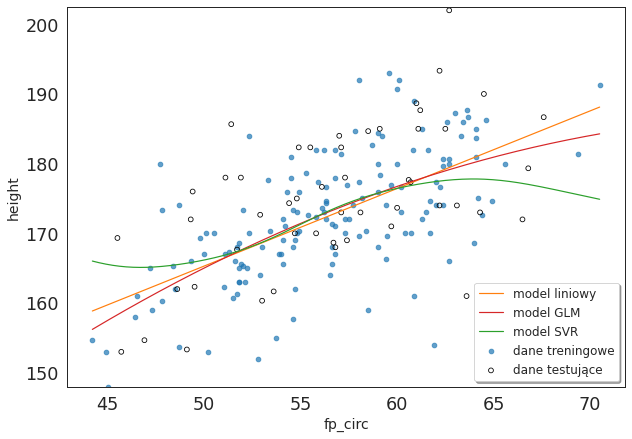


Male
Parametry modelu liniowego: [0.7305], 134.73851
Średni błąd  modelu liniowego: 4.23

Błąd średniokwadratowy modelu liniowego: 29.7

Parametry modelu GLM: [ 0.      2.7244 -0.0166], 75.01211
Średni błąd  modelu GLM: 4.24

Błąd średniokwadratowy modelu GLM: 29.6

Średni błąd modelu SVR: 4.06
Błąd średniokwadratowy modelu SVR: 29.7


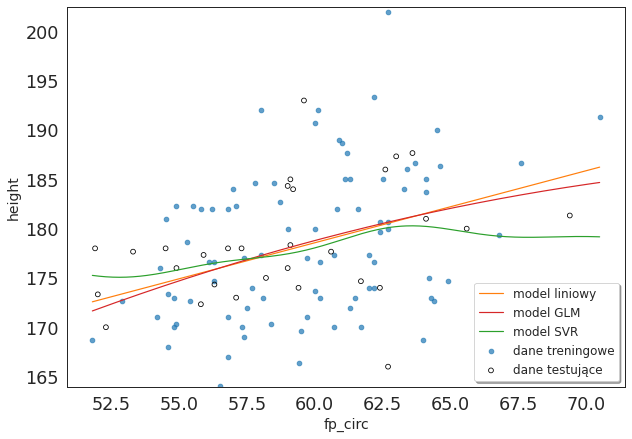


Female
Parametry modelu liniowego: [0.53983], 137.00652
Średni błąd  modelu liniowego: 5.11

Błąd średniokwadratowy modelu liniowego: 54.5

Parametry modelu GLM: [ 0.     13.0096 -0.1166], -193.7554
Średni błąd  modelu GLM: 5.92

Błąd średniokwadratowy modelu GLM: 60.2

Średni błąd modelu SVR: 5.73
Błąd średniokwadratowy modelu SVR: 56.6


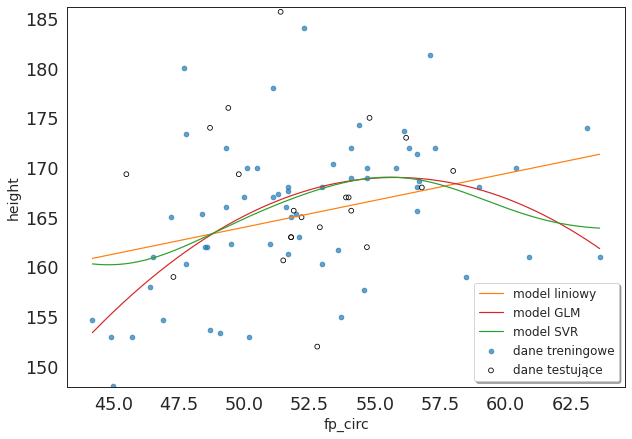

In [102]:
calc_reg(df, 'fp_circ', 'height')
print('\nMale')
calc_reg(df[df['gender'] == 1], 'fp_circ', 'height')
print('\nFemale')
calc_reg(df[df['gender'] == 0], 'fp_circ', 'height')

Parametry modelu liniowego: [4.78581], 8.14961
Średni błąd  modelu liniowego: 8.47

Błąd średniokwadratowy modelu liniowego: 1.2e+02

Parametry modelu GLM: [ 0.     10.0501 -0.1943], -27.07357
Średni błąd  modelu GLM: 8.4

Błąd średniokwadratowy modelu GLM: 1.18e+02

Średni błąd modelu SVR: 8.41
Błąd średniokwadratowy modelu SVR: 1.22e+02


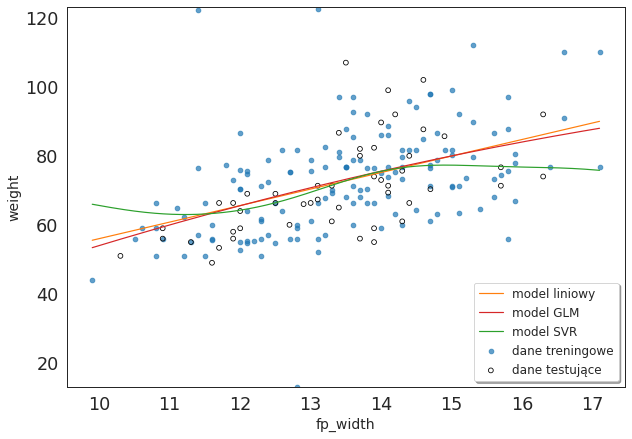


Male
Parametry modelu liniowego: [3.53468], 27.35318
Średni błąd  modelu liniowego: 8.14

Błąd średniokwadratowy modelu liniowego: 99.5

Parametry modelu GLM: [  0.     -12.1337   0.5374], 140.89105
Średni błąd  modelu GLM: 8.19

Błąd średniokwadratowy modelu GLM: 1.02e+02

Średni błąd modelu SVR: 8.15
Błąd średniokwadratowy modelu SVR: 1.08e+02


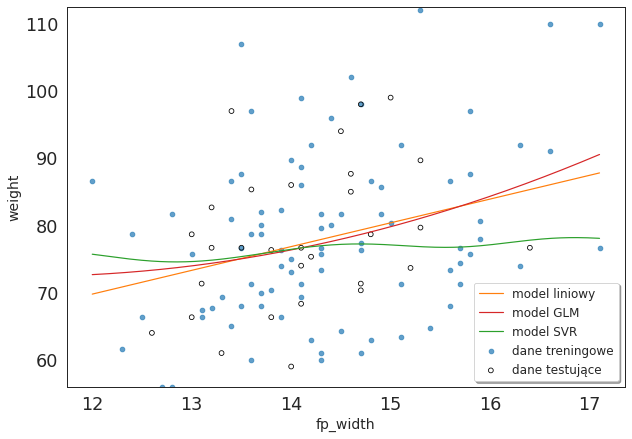


Female
Parametry modelu liniowego: [2.94742], 28.2371
Średni błąd  modelu liniowego: 9.88

Błąd średniokwadratowy modelu liniowego: 2.21e+02

Parametry modelu GLM: [ 0.     26.4396 -0.9243], -119.63741
Średni błąd  modelu GLM: 9.54

Błąd średniokwadratowy modelu GLM: 2.21e+02

Średni błąd modelu SVR: 10.5
Błąd średniokwadratowy modelu SVR: 2.3e+02


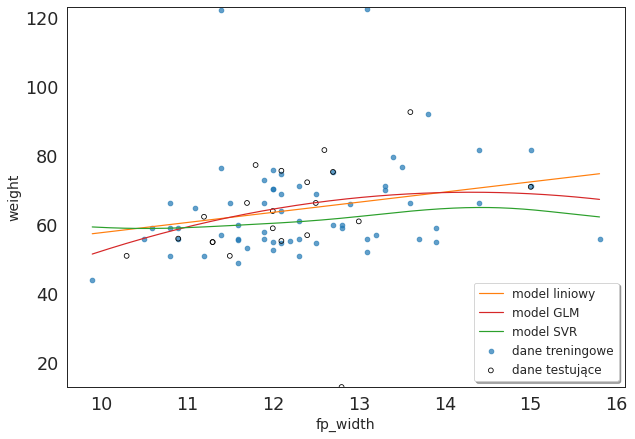

In [103]:
calc_reg(df, 'fp_width', 'weight')
print('\nMale')
calc_reg(df[df['gender'] == 1], 'fp_width', 'weight')
print('\nFemale')
calc_reg(df[df['gender'] == 0], 'fp_width', 'weight')

         sumsquare_error         aic          bic  kl_div
gennorm         0.000847  1174.94759 -2458.419122     inf


{'gennorm': {'beta': 2.805602848497876,
  'loc': 234.2555664694841,
  'scale': 69.87241943353413}}

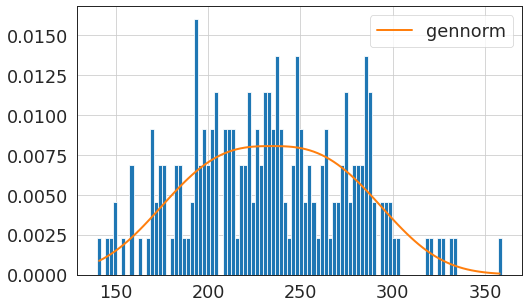

In [104]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="fp_area", kind="hist", bins = 50, aspect = 1.5)

f = Fitter(df['fp_area'],
           distributions='gennorm')
f.fit()
print(f.summary())
f.get_best(method = 'sumsquare_error')

In [105]:
X = df.drop(['gender','weight','height'], axis=1).values
Y = df['gender'].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.75, test_size=0.25, random_state=143)

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.86
